In [1]:
import numpy as np
import pandas as pd
import torch
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Generating Random Data

In [2]:
arr = np.random.rand(400,12)
arr

array([[0.76379075, 0.53258926, 0.5346909 , ..., 0.51442778, 0.72011216,
        0.72986527],
       [0.91585168, 0.5432185 , 0.91966708, ..., 0.05159163, 0.61103802,
        0.12296541],
       [0.73605277, 0.72053364, 0.74037531, ..., 0.95773489, 0.6801285 ,
        0.22699297],
       ...,
       [0.77194491, 0.89565081, 0.05907816, ..., 0.3254291 , 0.75067431,
        0.48569572],
       [0.81627902, 0.57853139, 0.59203981, ..., 0.66943226, 0.55445716,
        0.26692007],
       [0.50400866, 0.8802303 , 0.41413307, ..., 0.72046018, 0.75462165,
        0.41993483]])

In [3]:
df = pd.DataFrame(arr, columns = [1,2,3,4,5,6,7,8,9,10,11,12])
df.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.763791,0.532589,0.534691,0.166518,0.681433,0.440421,0.934989,0.342446,0.491543,0.514428,0.720112,0.729865
1,0.915852,0.543218,0.919667,0.767791,0.397081,0.039320,0.110383,0.812626,0.966996,0.051592,0.611038,0.122965
2,0.736053,0.720534,0.740375,0.558504,0.481362,0.292641,0.650774,0.240138,0.395622,0.957735,0.680129,0.226993
3,0.154754,0.815458,0.392022,0.230645,0.032113,0.845185,0.522903,0.704951,0.768485,0.631514,0.753000,0.683975
4,0.211393,0.421890,0.143713,0.100780,0.377814,0.036461,0.352292,0.588766,0.612891,0.501407,0.802239,0.461343
5,0.666220,0.663474,0.337445,0.024511,0.282917,0.121767,0.982789,0.374011,0.987838,0.637689,0.453099,0.483526
6,0.597685,0.731325,0.740997,0.403936,0.696423,0.079188,0.837220,0.135312,0.147777,0.246218,0.897635,0.127293
7,0.554402,0.730536,0.728566,0.522854,0.970614,0.086647,0.804411,0.814437,0.982028,0.292445,0.144746,0.692805
8,0.499435,0.224357,0.039307,0.924170,0.178041,0.943504,0.055841,0.198578,0.031108,0.761777,0.433796,0.371219
9,0.876957,0.735029,0.413464,0.791050,0.757697,0.598502,0.002444,0.465754,0.943763,0.748792,0.022848,0.972501


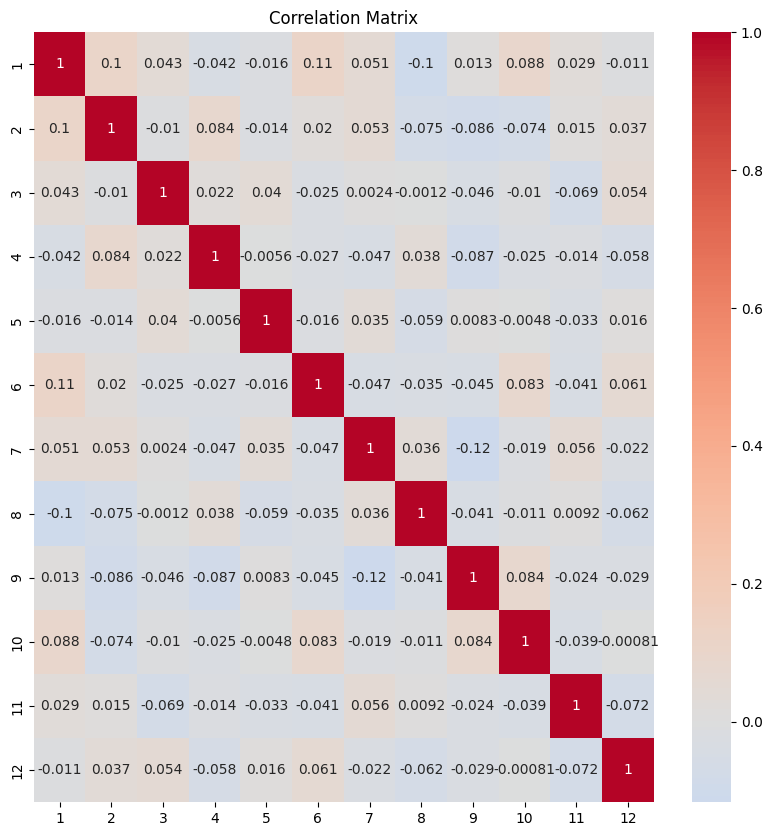

In [4]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', center = 0)
plt.title('Correlation Matrix')
plt.show()

In [5]:
corr_np = correlation_matrix.to_numpy
sum_row  = np.zeros(12)
for i in range(12):
    temp = 0
    for j in range(12):
        temp += correlation_matrix.values[i][j]
    sum_row[i] = temp

sum_row

array([1.27238033, 1.05311924, 0.99933727, 0.83987942, 0.95165715,
       1.04249168, 0.9831145 , 0.69932575, 0.63029804, 1.07222222,
       0.81666706, 0.91250473])

Column with the least amount of total correlation becomes the target

In [6]:
df.rename(columns={9: 'target'}, inplace = True)
conditions = [(df['target'] < 0.25), (df['target']>=0.25) & (df['target'] < 0.75), (df['target']>= 0.75)]
labels = [1,2,3]
df['target'] = np.select(conditions, labels)
df

,1,2,3,4,5,6,7,8,target,10,11,12
0,0.763791,0.532589,0.534691,0.166518,0.681433,0.440421,0.934989,0.342446,2,0.514428,0.720112,0.729865
1,0.915852,0.543218,0.919667,0.767791,0.397081,0.039320,0.110383,0.812626,3,0.051592,0.611038,0.122965
2,0.736053,0.720534,0.740375,0.558504,0.481362,0.292641,0.650774,0.240138,2,0.957735,0.680129,0.226993
3,0.154754,0.815458,0.392022,0.230645,0.032113,0.845185,0.522903,0.704951,3,0.631514,0.753000,0.683975
4,0.211393,0.421890,0.143713,0.100780,0.377814,0.036461,0.352292,0.588766,2,0.501407,0.802239,0.461343
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.281189,0.190650,0.678588,0.802251,0.308973,0.384848,0.842876,0.950054,2,0.212225,0.795353,0.043384
396,0.013203,0.183785,0.747526,0.946007,0.811334,0.600078,0.534269,0.363505,1,0.680609,0.769546,0.976073
397,0.771945,0.895651,0.059078,0.752947,0.376338,0.976181,0.482123,0.911272,1,0.325429,0.750674,0.485696
398,0.816279,0.578531,0.592040,0.714772,0.057869,0.840380,0.171393,0.033897,1,0.669432,0.554457,0.266920


# Gaussian Naive Bayes

In [7]:
modelNB = GaussianNB()
data_df = df.drop(columns = ['target'])
target_df = df['target']
train_data, test_data, train_target, test_target = train_test_split(data_df, target_df, test_size=0.25)
modelNB.fit(train_data, train_target)

GaussianNB()

In [8]:
probs = modelNB.predict_proba(data_df)

In [9]:
max_probs = probs.max(axis = 1, keepdims = True)
max_probs

array([[0.42068946],
       [0.49543612],
       [0.59013363],
       [0.45310697],
       [0.54867406],
       [0.40877764],
       [0.48475263],
       [0.51330205],
       [0.58568385],
       [0.59168213],
       [0.5507571 ],
       [0.52630478],
       [0.58611608],
       [0.40241656],
       [0.55737669],
       [0.53560315],
       [0.57653547],
       [0.47458347],
       [0.43744187],
       [0.56803036],
       [0.60657126],
       [0.40582889],
       [0.48681403],
       [0.46526838],
       [0.48161892],
       [0.48764057],
       [0.504318  ],
       [0.39562539],
       [0.5387605 ],
       [0.44445826],
       [0.56114793],
       [0.39772553],
       [0.47435854],
       [0.43747712],
       [0.56177388],
       [0.49597778],
       [0.68386579],
       [0.43155065],
       [0.66025646],
       [0.49037671],
       [0.5269214 ],
       [0.52579114],
       [0.51493675],
       [0.47902584],
       [0.42912596],
       [0.39826607],
       [0.53313843],
       [0.424

Adding the GaussianNB Probabilities as a new column to our dataset

In [10]:
df['NB'] = max_probs.flatten()
df

,1,2,3,4,5,6,7,8,target,10,11,12,NB
0,0.763791,0.532589,0.534691,0.166518,0.681433,0.440421,0.934989,0.342446,2,0.514428,0.720112,0.729865,0.420689
1,0.915852,0.543218,0.919667,0.767791,0.397081,0.039320,0.110383,0.812626,3,0.051592,0.611038,0.122965,0.495436
2,0.736053,0.720534,0.740375,0.558504,0.481362,0.292641,0.650774,0.240138,2,0.957735,0.680129,0.226993,0.590134
3,0.154754,0.815458,0.392022,0.230645,0.032113,0.845185,0.522903,0.704951,3,0.631514,0.753000,0.683975,0.453107
4,0.211393,0.421890,0.143713,0.100780,0.377814,0.036461,0.352292,0.588766,2,0.501407,0.802239,0.461343,0.548674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.281189,0.190650,0.678588,0.802251,0.308973,0.384848,0.842876,0.950054,2,0.212225,0.795353,0.043384,0.493842
396,0.013203,0.183785,0.747526,0.946007,0.811334,0.600078,0.534269,0.363505,1,0.680609,0.769546,0.976073,0.471429
397,0.771945,0.895651,0.059078,0.752947,0.376338,0.976181,0.482123,0.911272,1,0.325429,0.750674,0.485696,0.642018
398,0.816279,0.578531,0.592040,0.714772,0.057869,0.840380,0.171393,0.033897,1,0.669432,0.554457,0.266920,0.661515


# MLP

In order to compare the results, we train MLP with and without the NB column.
### 1. Without the NB Column

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64), 
    activation='relu',           
    solver='adam',                
    max_iter=100,                
    random_state=42
)

mlp.fit(train_data, train_target)

print("Train accuracy:", mlp.score(train_data, train_target))
print("Test accuracy:", mlp.score(test_data, test_target))

Train accuracy: 0.93
Test accuracy: 0.52


/home/taha/Desktop/cnnn/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### 2. With the NB Column

In [15]:
new_data_df = df.drop(columns = ['target'])
new_target_df = df['target']
new_train_data, new_test_data, new_train_target, new_test_target = train_test_split(data_df, target_df, test_size=0.25)

new_train_data = scaler.fit_transform(new_train_data)
new_test_data = scaler.transform(new_test_data)

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64), 
    activation='relu',           
    solver='adam',                
    max_iter=100,                
    random_state=42
)

mlp.fit(train_data, train_target)

print("Train accuracy:", mlp.score(new_train_data, new_train_target))
print("Test accuracy:", mlp.score(new_test_data, new_test_target))

Train accuracy: 0.8066666666666666
Test accuracy: 0.79


/home/taha/Desktop/cnnn/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# Results

In [17]:
list_temp = [['Train', 0.93, 0.807],
             ['Test', 0.52, 0.79]]
df_result = pd.DataFrame(list_temp, columns = ['', 'MLP Accuracy', 'Gaussian NB + MLP Accuracy'])
df_result

,,MLP Accuracy,Gaussian NB + MLP Accuracy
0,Train,0.93,0.807
1,Test,0.52,0.790
